# Capstone Webscrapping using BeautifulSoup

**IMDb** (Internet Movie Database) adalah sebuah basis data daring informasi yang berkaitan dengan film, acara televisi, video rumahan, dan permainan video, dan acara internet, termasuk daftar pemeran, biografi kru produksi dan personil, ringkasan alur cerita, trivia, dan ulasan serta penilaian oleh penggemar.<br>
Pada project Capstone kali ini akan dilakukan pengumpulan data dan informasi pada situs **IMDb** dengan mengimplementasikan teknik web scrapping menggunakan `BeatufilSoup` dan analisa atas informasi yang didapat yaitu film terpopuler versi IMDB



In [4]:
import requests

start_date = '2019-01-01'
end_date = '2019-12-31'
url_get = requests.get(f'https://www.imdb.com/search/title/?release_date={start_date},{end_date}')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [5]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [6]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [7]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Pencarian key dengan menggunakan fungsi `.find()` dan `.find_all()`. Jika dilihat dari HTML pada halaman tersebut, seluruh data Film yang akan diambil berada di dalam `<div class='lister-list'>...</div>` dengan menggunakan fungsi `.find()`  <br>
Kemudian untuk mendapatkan seluruh content dari film `<div>` perlu dilakukan pencarian key sekali lagi dengan menggunakan `.find_all()` dengan pada `<div class='lister-list'>...</div>`

In [8]:
table = soup.find("div",{"class":"lister-list"})
table
#print(table.prettify()[1:15000])
div = table.find_all("div",{"class":"lister-item-content"})
div

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt8111088/">The Mandalorian</a>
 <span class="lister-item-year text-muted unbold">(2019– )</span>
 </h3>
 <p class="text-muted">
 <span class="runtime">40 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Adventure, Sci-Fi            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.7" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.7</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt8111088" id="urv_tt8111088">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt8111088">
 <div class="rating rating-list" data-auth="" data-ga-identifi

**Proses Web Scraping:**<br>
1. Proses scraping dilakukan untuk mendapatkan Judul Film, Rating, Meta Score dan Votes dari masing-masing film terpopuler menurut versi IMDB
2. Lakukan looping terhadap data yang sudah diambil pada proses sebelumnya. Masing-masing content yang akan di scrapping memiliki key, sebagai berikut: **Judul Film** berada pada `<a>`,  **Rating** berada pada tag `<strong>`, **Meta Score** terletak pada `<span class='metascore'>` dan **Votes** terletak pada `<span name='nv'>`
3. Kemudian dapatkan text dengan menggunakan `text` atau `.get_text()` dan simpan hasilnya pada tupple `temp`

In [9]:
temp = [] #initiating a tuple

for i in div:
    #scrapping process
    #get judul film
    judul_film = i.find('a').get_text() 
    
    #get rating imdb
    rating = i.find('strong').get_text()
    rating = rating.strip()
    
    #mencari meta score imdb
    if(i.find('span',{'class':'metascore'})):
        meta_score = i.find('span',{'class':'metascore'}).get_text()
        meta_score = meta_score.strip()
    else:
        #jika meta score (blank) akan diisi dengan nilai 0
        meta_score='0'
    
    #get total votes
    if(i.find('span',{'name':'nv'})):
        votes = i.find('span',{'name':'nv'}).get_text()
        votes = votes.strip()
    else :
        #jika votes (blank) akan diisi dengan nilai 0
        votes = '0'
    
    
    temp.append((judul_film,rating,meta_score,votes))
    
    
temp 

[('The Mandalorian', '8.7', '0', '217,864'),
 ('His Dark Materials', '7.9', '0', '42,023'),
 ('The Boys', '8.7', '0', '217,351'),
 ('Dreamland', '5.7', '57', '1,140'),
 ('Jojo Rabbit', '7.9', '58', '277,437'),
 ('Servant', '7.6', '0', '15,838'),
 ('Wayne', '8.4', '0', '8,467'),
 ('The Gentlemen', '7.8', '51', '207,283'),
 ('Undercover', '7.9', '0', '9,395'),
 ('The Witcher', '8.2', '0', '282,490'),
 ('Knives Out', '7.9', '82', '418,912'),
 ('Gisaengchung', '8.6', '96', '511,784'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '530,619'),
 ('Joker', '8.5', '59', '899,852'),
 ('Avengers: Endgame', '8.4', '78', '782,276'),
 ('Sex Education', '8.3', '0', '148,949'),
 ('Euphoria', '8.4', '0', '53,566'),
 ('Warrior', '8.2', '0', '13,060'),
 ('1917', '8.3', '78', '392,742'),
 ('Midsommar', '7.1', '72', '190,761'),
 ('Chernobyl', '9.4', '0', '513,301'),
 ('Doctor Sleep', '7.3', '59', '135,734'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '6.6', '53', '359,007'),
 ('The Unicorn', '

Masukkan data tuple `temp` ke dalam suatu dataframe

In [10]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Judul','Rating','Meta_Score','Votes'))
df.head()

,Judul,Rating,Meta_Score,Votes
0,The Mandalorian,8.7,0,"217,864"
1,His Dark Materials,7.9,0,"42,023"
2,The Boys,8.7,0,"217,351"
3,Dreamland,5.7,57,"1,140"
4,Jojo Rabbit,7.9,58,"277,437"


**Data Wrangling:** <br>
1. Menghilangkan karakter/tanda koma (,) pada data di kolom **Votes** <br>
1. Merubah tipe data **Rating** menjadi `float`, **Meta Score** menjadi `integer`, dan **Votes** menjadi `integer`

In [11]:
df['Rating'] = df['Rating'].astype('float64')
df['Meta_Score'] = df['Meta_Score'].astype('int')
df['Votes'] = df['Votes'].apply(lambda x: x.replace(',','')) #menghilangkan karakter koma (,)
df['Votes'] = df['Votes'].astype('int')
# df['inflation'] = df['inflation'].str.replace(" %","")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Judul       50 non-null     object 
 1   Rating      50 non-null     float64
 2   Meta_Score  50 non-null     int32  
 3   Votes       50 non-null     int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 1.0+ KB


In [12]:
df.head(7)

,Judul,Rating,Meta_Score,Votes
0,The Mandalorian,8.7,0,217864
1,His Dark Materials,7.9,0,42023
2,The Boys,8.7,0,217351
3,Dreamland,5.7,57,1140
4,Jojo Rabbit,7.9,58,277437
5,Servant,7.6,0,15838
6,Wayne,8.4,0,8467


Dari data diatas akan dibuat visualisasi yang akan digunakan sebagai insight dalam melakukan analisa atas film terpopuler. Berikut adalah grafik/plot yang menggambarkan 50 film terpopuler berdasarkan **Rating**, **Meta Score** dan **Votes**

<AxesSubplot:xlabel='Judul'>

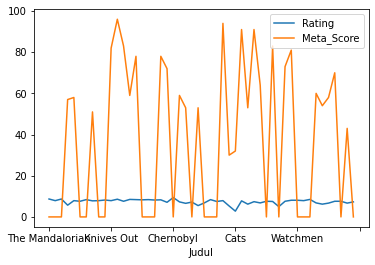

In [13]:
df_plot = df.set_index('Judul').copy()
df_plot
df_plot[['Rating','Meta_Score']].plot()


<AxesSubplot:xlabel='Judul'>

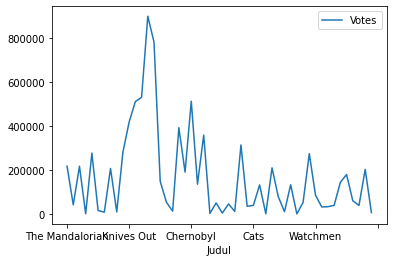

In [14]:
df_plot[['Votes']].plot()

**Grafik 7 Film Terpopuler Tahun 2019 versi IMDB berdasarkan Rating, Meta Score dan Votes**<br>
Dari 50 film terpopuler tersebut akan kita ambil 7 film terpopuler versi IMDB untuk dilakukan analisa. Berikut adalah grafik/plot 7 Film Terpopuler berdasarkan **Rating**, **Meta Score** dan **Votes**

<AxesSubplot:xlabel='Judul'>

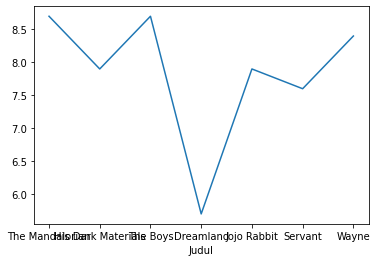

In [15]:
df_plot['Rating'].head(7).plot()

<AxesSubplot:xlabel='Judul'>

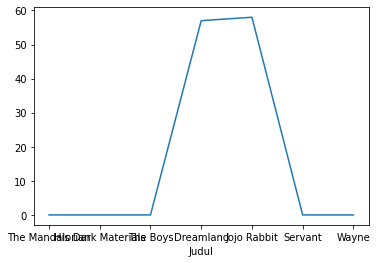

In [16]:
df_plot['Meta_Score'].head(7).plot()

<AxesSubplot:xlabel='Judul'>

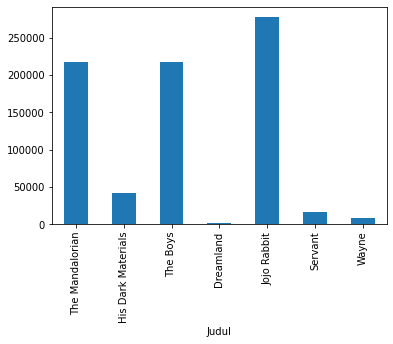

In [23]:
df_plot['Votes'].head(7).plot(kind="bar")

**Hasil Analisa**<br><br>
Dalam menentukan tingkat popularitas suatu film, IMDB menggunakan MovieMeter Rank dengan algoritma khusus yang dihitung secara mingguan. IMDB tidak menyebutkan secara spesifik bagaimana mereka melakukan perhitungan tersebut, salah satu alasannya adalah mencegah orang untuk memanipulasi penilaian popularitas tersebut.

Namun, kita dapat mencoba melakukan analisa berdasarkan data yang tersedia di website IMDB. Berdasarkan data popularitas film yang release selama tahun 2019 menunjukkan bahwa Rating dan Votes mempunyai pengaruh yang cukup signifikan dalam menentukan popularitas. Sedangkan Meta Score kurang memiliki dampak yang signifikan, hal itu dapat dilihat bahwa 5 dari 7 film paling populer tidak memiliki Meta Score, sedangkan 2 film yang memiliki Meta Score hanya meraih nilai 57 dan 58.

'The Mandalorian' merupakan film yang paling populer dengan rating 8,7 dan mendapatkan 217.639 votes, disusul 'His Dark Materials' dengan rating 7.9 dan 41.967 Votes. Diperingkat ketiga terpopuler adalah 'The Boys' dengan rating 8,7 dan 217.197 votes. Namun, ada anomali pada Film 'Dreamland' yang hanya memperoleh rating 5,7 dan 1.106 votes tetapi bisa meraih peringkat 4 terpopuler, jika dibandingkan dengan film di posisi dibawahnya yaitu 'Jojo Rabbit' dengan rating 7,9 dan 277.283 votes maupun film diperingkat ke-7 'Wayne' dengan rating 8,4 dan 8.444 votes. Hal tersebut, kemungkinan terjadi karena beberapa faktor yang mempengaruhi antara lain page per view judul film, popularitas actor pada film tersebut, dsb. 

Dapat kita simpulkan bahwa Rating dan Votes merupakan salah satu parameter penilaian yang cukup krusial dalam penentuan pupolaritas suatu film di IMDB.


Grafik dapat juga dilihat melaui Flask Dashboard pada alamat http://127.0.0.1:5000/